In [1]:
import pandas as pd
import pickle,os, copy
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import sys
sys.path.append("..")
from nets import Nets
from utils import *

import re

from sklearn.cluster import DBSCAN

from interpolation import *


from postprocessing import *
from analysis import *

%load_ext autoreload
%autoreload 2

In [168]:
exp_root = "/Users/daniellengyel/flat_sharp/flat_sharp/experiments/{}" #"/Users/daniellengyel/flat_sharp/gaussian/gaussian_experiments/Apr03_17-38-00_Daniels-MacBook-Pro-4.local"
# configs = get_configs(experiment_folder)

In [172]:
# get all sorts of data
exp_dict = {}

experiment_folder = exp_root.format("CIFAR10/SimpleNet_bs_lr") #Apr27_00-03-27_Daniels-MacBook-Pro-4.local
exp_dict["stuff"] = get_stuff(experiment_folder)
exp_dict["models"] = get_all_models(experiment_folder, -1)
exp_dict["resampling_idxs"] = get_sample_idxs(experiment_folder)

Getting tsne.
Error: tsne could not be found
Getting runs.
Getting trace.
Getting acc.
Getting dist.
Error: dist could not be found
Getting loss.
Getting grad.
Error: grad could not be found


In [173]:
stats_df = get_end_stats(exp_dict)


/Users/daniellengyel/flat_sharp/flat_sharp/analysis.py:316: RuntimeWarning: invalid value encountered in multiply
  to_append = curr_arr[-1] * (1 - running_average_gamma) + running_average_gamma * to_append


Did not use lineages for 1593851589.496072
Did not use lineages for 1593850820.2635083
Did not use lineages for 1593850398.0663092
Did not use lineages for 1593834331.5809004
Did not use lineages for 1593850090.5281775
Did not use lineages for 1593826940.48897
Did not use lineages for 1593844667.9532132
Did not use lineages for 1593841011.490725
Did not use lineages for 1593853139.0300891
Did not use lineages for 1593849979.4498076
Did not use lineages for 1593847785.5662594
Did not use lineages for 1593854629.305852
Did not use lineages for 1593827057.6671357
Did not use lineages for 1593848537.279907
Did not use lineages for 1593847349.194523
Did not use lineages for 1593830886.8032768
Did not use lineages for 1593853859.1168635
Did not use lineages for 1593840569.284906
Did not use lineages for 1593837248.7753067
Did not use lineages for 1593827403.2057972
Did not use lineages for 1593847040.9429178
Did not use lineages for 1593831377.2254915
Did not use lineages for 1593840683.0173

In [174]:
# stats_df = stats_df[stats_df["Acc Test Mean"] > 0.15]
stats_df.sort_values(by="Acc Test Max", ascending=False)

Acc Test Max  Acc Test Mean  Acc Test Min  Acc Train Max  \
1593850820.2635083        0.4346        0.29790        0.1000         1.0000   
1593847785.5662594        0.4341        0.42922        0.4228         1.0000   
1593851589.496072         0.4292        0.29568        0.1000         1.0000   
1593844667.9532132        0.4263        0.42002        0.4136         1.0000   
1593840683.0173466        0.4250        0.39954        0.3860         0.6170   
1593848537.279907         0.4249        0.42262        0.4197         1.0000   
1593844222.636462         0.4246        0.39948        0.3097         0.9994   
1593847349.194523         0.4229        0.29522        0.1000         0.9968   
1593845464.2898428        0.4228        0.41782        0.4100         1.0000   
1593841465.3004317        0.4191        0.40744        0.3959         0.9928   
1593839018.0483027        0.4172        0.40060        0.3641         0.7344   
1593844040.3160887        0.4165        0.39518        0.3434         0.8426   
1593838178.7467582        0.4127        0.39818        0.3749         0.6996   
1593840822.2167625        0.4123        0.39974        0.3671         0.7662   
1593842260.9785497        0.4114        0.39340        0.3265         0.9982   
1593843901.2854896        0.4111        0.39372        0.3806         0.6562   
1593837501.112212         0.4072        0.40118        0.3938         0.5618   
1593847174.9349813        0.4071        0.39526        0.3880         0.8172   
1593837361.6218116        0.4037        0.38870        0.3732         0.4966   
1593841011.490725         0.4013        0.36950        0.3278         0.9070   
1593850398.0663092        0.3978        0.15954        0.0999         0.9054   
1593840569.284906         0.3958        0.38046        0.3685         0.4852   
1593847040.9429178        0.3891        0.37498        0.3547         0.5726   
1593837248.7753067        0.3875        0.37118        0.3560         0.4466   
1593837691.9748216        0.3848        0.33960        0.2963         0.5784   
1593850222.6424887        0.3734        0.36654        0.3598         0.6150   
1593843790.4592059        0.3694        0.35978        0.3330         0.4686   
1593834812.3039174        0.3371        0.32682        0.3115         0.3594   
1593835658.453159         0.3355        0.32658        0.3121         0.3604   
1593834331.5809004        0.3339        0.32430        0.3126         0.3492   
1593834139.0720687        0.3330        0.32042        0.3061         0.3550   
1593833996.3255532        0.3244        0.31104        0.2987         0.3476   
1593833878.5613267        0.3218        0.30630        0.2943         0.3350   
1593846931.0290303        0.2925        0.27882        0.2507         0.3412   
1593850090.5281775        0.2530        0.21098        0.1000         0.2850   
1593832243.3303878        0.2401        0.22670        0.2197         0.2334   
1593831377.2254915        0.2391        0.22622        0.2188         0.2346   
1593830690.7731338        0.2376        0.21992        0.1998         0.2362   
1593830886.8032768        0.2368        0.22366        0.2152         0.2374   
1593830546.7163937        0.2357        0.22182        0.2128         0.2294   
1593830431.225486         0.2317        0.22284        0.2049         0.2382   
1593827892.799503         0.1996        0.18418        0.1639         0.2082   
1593828773.4029207        0.1994        0.18428        0.1639         0.2076   
1593827403.2057972        0.1991        0.18208        0.1618         0.2068   
1593827057.6671357        0.1990        0.18762        0.1637         0.2080   
1593826940.48897          0.1985        0.18168        0.1610         0.2042   
1593827203.5168657        0.1967        0.18298        0.1636         0.2060   
1593823646.509155         0.1262        0.10896        0.1000         0.1268   
1593823499.3297808        0.1232        0.10842        0.1000         0.1260   
1593825234.8118045  

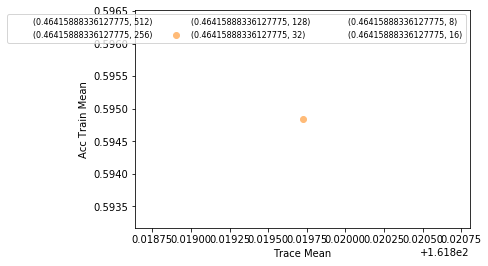

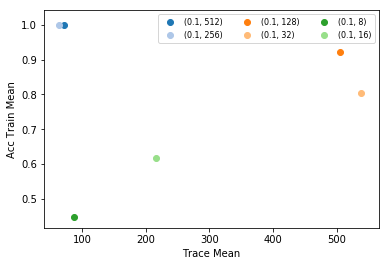

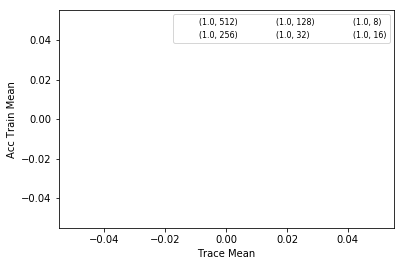

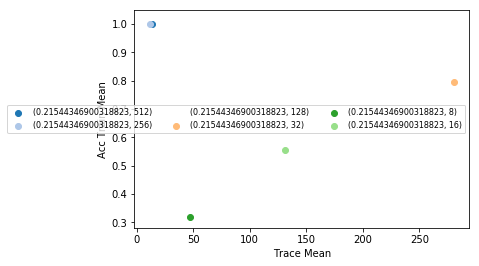

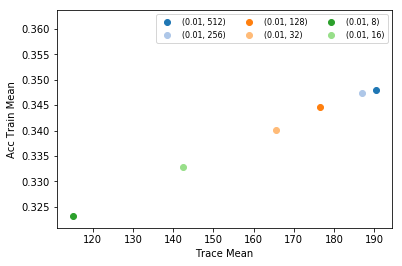

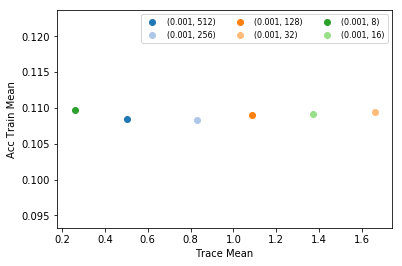

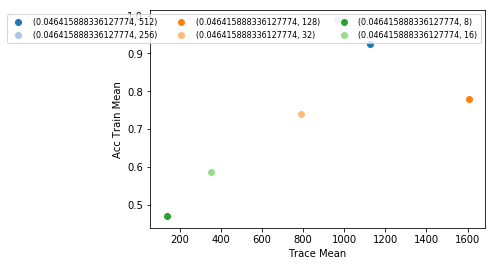

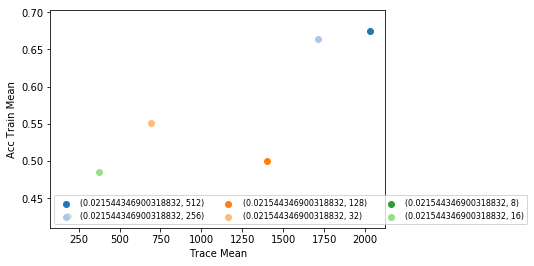

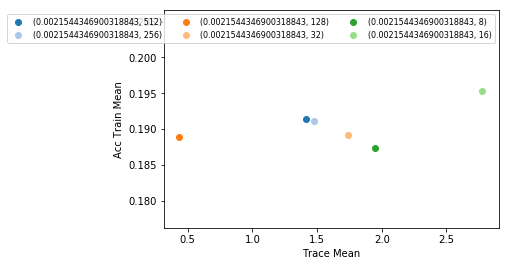

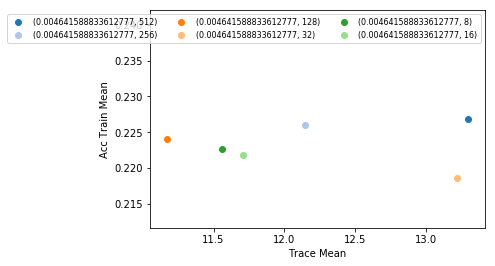

In [181]:
plot_stats(stats_df,  "Trace Mean", "Acc Train Mean",  
           filter_seperate=["learning_rate", ], filter_not_seperate=["batch_train_size"], 
           X_axis_bounds=None, Y_axis_bounds=None,
          X_axis_display_name=None, Y_axis_display_name=None, 
          save_exp_path=None)

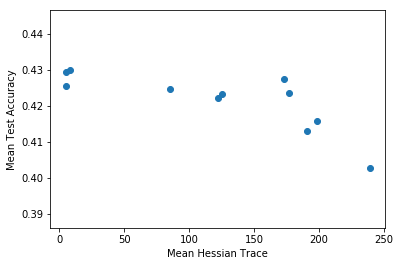

In [113]:
plot_stats(stats_df,  "Trace Mean", "Acc Test Mean",  
           filter_seperate=[], filter_not_seperate=[], 
           X_axis_bounds=None, Y_axis_bounds=None,
          X_axis_display_name="Mean Hessian Trace", Y_axis_display_name="Mean Test Accuracy", 
          save_exp_path=experiment_folder)

In [191]:
# pre_filtered_idxs = stats_df[(stats_df["softmax_beta"] >= 500) | (stats_df["softmax_beta"] <= -500 )].index
# pre_filtered_exp_dict = {i: exp_dict[i] for i in pre_filtered_idxs}

plot_special(exp_dict, "time", "Trace", 
             filter_seperate=[], filter_not_seperate=[],
             save_exp_path=experiment_folder, X_axis_bounds=None, Y_axis_bounds=None,
            pre_filtered_exp_ids=["1593844667.9532132", ], is_mean=False)


AttributeError: 'NoneType' object has no attribute 'T'

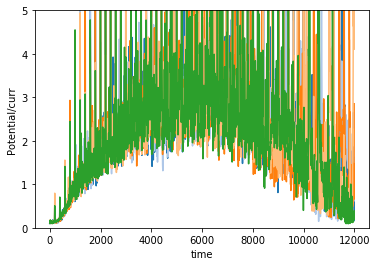

In [187]:

# pre_filtered_idxs = stats_df[(stats_df["softmax_beta"] >= 500) | (stats_df["softmax_beta"] <= -500 )].index
# pre_filtered_exp_dict = {i: exp_dict[i] for i in pre_filtered_idxs}

plot_special(exp_dict, "time", "Potential/curr", 
             filter_seperate=[], filter_not_seperate=[],
             save_exp_path=experiment_folder, X_axis_bounds=None, Y_axis_bounds=[0, 5],
            pre_filtered_exp_ids=["1593844222.636462", ], is_mean=False)


Correlation for () trace:all/acc train: nan


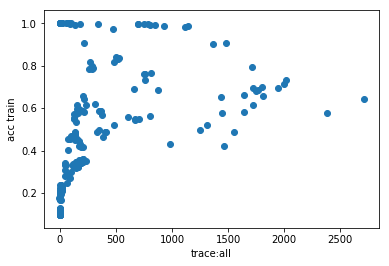

In [194]:
plot_special(exp_dict, "trace:all", 
             "acc train", filter_seperate=[], filter_not_seperate=[],
             pre_filtered_exp_ids=None,
             save_exp_path=None, X_axis_bounds=None, Y_axis_bounds=None,
        X_axis_display_name=None, Y_axis_display_name=None, 
)


Correlation for (0,) softmax_beta/gap acc:all: nan
Correlation for (1.0,) softmax_beta/gap acc:all: nan
Correlation for (100.0,) softmax_beta/gap acc:all: nan
Correlation for (-25.75,) softmax_beta/gap acc:all: nan
Correlation for (75.25,) softmax_beta/gap acc:all: nan
Correlation for (-50.5,) softmax_beta/gap acc:all: nan
Correlation for (50.5,) softmax_beta/gap acc:all: nan
Correlation for (-75.25,) softmax_beta/gap acc:all: nan
Correlation for (25.75,) softmax_beta/gap acc:all: nan
Correlation for (-100.0,) softmax_beta/gap acc:all: nan
Correlation for (-1.0,) softmax_beta/gap acc:all: nan


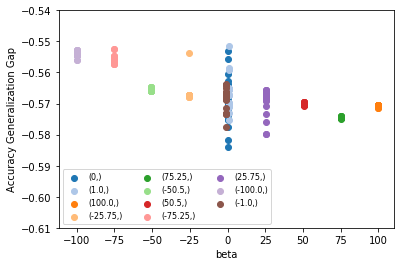

In [110]:
plot_special(exp_dict, "softmax_beta", 
             "gap acc:all", filter_seperate=[], filter_not_seperate=["softmax_beta"],
             pre_filtered_exp_ids=None,
             save_exp_path=experiment_folder, X_axis_bounds=None, Y_axis_bounds=[-0.61, -0.54],
            X_axis_display_name="beta", Y_axis_display_name="Accuracy Generalization Gap", )

(1, 6000, 20)
Correlation for (0,) softmax_beta/path:all: nan
(1, 6000, 20)
Correlation for (1.0,) softmax_beta/path:all: nan
(1, 6000, 20)
Correlation for (100.0,) softmax_beta/path:all: nan
(1, 6000, 20)
Correlation for (-25.75,) softmax_beta/path:all: nan
(1, 6000, 20)
Correlation for (75.25,) softmax_beta/path:all: nan
(1, 6000, 20)
Correlation for (-50.5,) softmax_beta/path:all: nan
(1, 6000, 20)
Correlation for (50.5,) softmax_beta/path:all: nan
(1, 6000, 20)
Correlation for (-75.25,) softmax_beta/path:all: nan
(1, 6000, 20)
Correlation for (25.75,) softmax_beta/path:all: nan
(1, 6000, 20)
Correlation for (-100.0,) softmax_beta/path:all: nan
(1, 6000, 20)
Correlation for (-1.0,) softmax_beta/path:all: nan


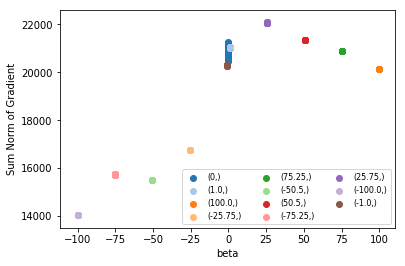

In [95]:
plot_special(exp_dict, "softmax_beta", 
             "path:all", filter_seperate=[], filter_not_seperate=["softmax_beta"],
             pre_filtered_exp_ids=None,
             save_exp_path=experiment_folder, X_axis_bounds=None, Y_axis_bounds=None,
        X_axis_display_name="beta", Y_axis_display_name="Sum Norm of Gradient", 
)

Correlation for (0,) softmax_beta/acc train:all: nan
Correlation for (1.0,) softmax_beta/acc train:all: nan
Correlation for (100.0,) softmax_beta/acc train:all: nan
Correlation for (-25.75,) softmax_beta/acc train:all: nan
Correlation for (75.25,) softmax_beta/acc train:all: nan
Correlation for (-50.5,) softmax_beta/acc train:all: nan
Correlation for (50.5,) softmax_beta/acc train:all: nan
Correlation for (-75.25,) softmax_beta/acc train:all: nan
Correlation for (25.75,) softmax_beta/acc train:all: nan
Correlation for (-100.0,) softmax_beta/acc train:all: nan
Correlation for (-1.0,) softmax_beta/acc train:all: nan


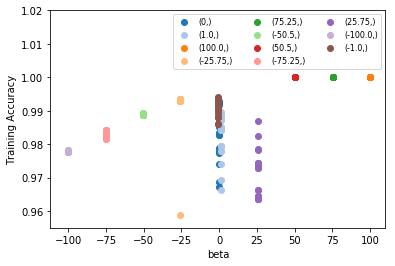

In [96]:
plot_special(exp_dict, "softmax_beta", 
             "acc train:all", filter_seperate=[], filter_not_seperate=["softmax_beta"],
             pre_filtered_exp_ids=None,
             save_exp_path=experiment_folder, X_axis_bounds=None, Y_axis_bounds=[0.955, 1.02],
        X_axis_display_name="beta", Y_axis_display_name="Training Accuracy", 
)

Correlation for (0,) softmax_beta/loss train:all: nan
Correlation for (1.0,) softmax_beta/loss train:all: nan
Correlation for (100.0,) softmax_beta/loss train:all: nan
Correlation for (-25.75,) softmax_beta/loss train:all: nan
Correlation for (75.25,) softmax_beta/loss train:all: nan
Correlation for (-50.5,) softmax_beta/loss train:all: nan
Correlation for (50.5,) softmax_beta/loss train:all: nan
Correlation for (-75.25,) softmax_beta/loss train:all: nan
Correlation for (25.75,) softmax_beta/loss train:all: nan
Correlation for (-100.0,) softmax_beta/loss train:all: nan
Correlation for (-1.0,) softmax_beta/loss train:all: nan


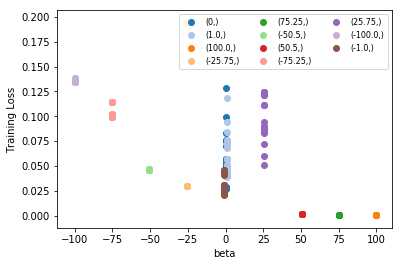

In [97]:
plot_special(exp_dict, "softmax_beta", 
             "loss train:all", filter_seperate=[], filter_not_seperate=["softmax_beta"],
             pre_filtered_exp_ids=None,
             save_exp_path=experiment_folder, X_axis_bounds=None, Y_axis_bounds=None,
        X_axis_display_name="beta", Y_axis_display_name="Training Loss", 
)

Correlation for (0,) softmax_beta/acc test:all: nan
Correlation for (1.0,) softmax_beta/acc test:all: nan
Correlation for (100.0,) softmax_beta/acc test:all: nan
Correlation for (-25.75,) softmax_beta/acc test:all: nan
Correlation for (75.25,) softmax_beta/acc test:all: nan
Correlation for (-50.5,) softmax_beta/acc test:all: nan
Correlation for (50.5,) softmax_beta/acc test:all: nan
Correlation for (-75.25,) softmax_beta/acc test:all: nan
Correlation for (25.75,) softmax_beta/acc test:all: nan
Correlation for (-100.0,) softmax_beta/acc test:all: nan
Correlation for (-1.0,) softmax_beta/acc test:all: nan


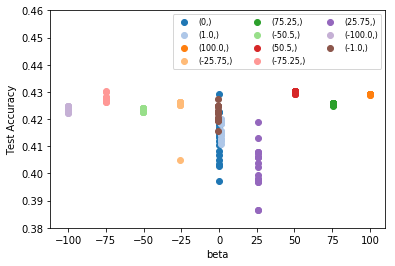

In [104]:
plot_special(exp_dict, "softmax_beta", 
             "acc test:all", filter_seperate=[], filter_not_seperate=["softmax_beta"],
             pre_filtered_exp_ids=None,
             save_exp_path=experiment_folder, X_axis_bounds=None, Y_axis_bounds=[0.38, 0.46],
        X_axis_display_name="beta", Y_axis_display_name="Test Accuracy", 
)

Correlation for (0,) loss train/acc test:all: -0.40866750442481103
Correlation for (1.0,) loss train/acc test:all: -0.5978731056015376
Correlation for (100.0,) loss train/acc test:all: 0.19243212525638764
Correlation for (-25.75,) loss train/acc test:all: -0.9960784970221818
Correlation for (75.25,) loss train/acc test:all: -0.021527326263153436
Correlation for (-50.5,) loss train/acc test:all: -0.4894343283628214
Correlation for (50.5,) loss train/acc test:all: -0.3958594536588277
Correlation for (-75.25,) loss train/acc test:all: -0.2710242180561301
Correlation for (25.75,) loss train/acc test:all: -0.7982509696353021
Correlation for (-100.0,) loss train/acc test:all: 0.18884045375781974
Correlation for (-1.0,) loss train/acc test:all: -0.04123841478380125


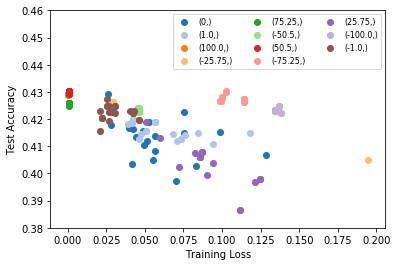

In [105]:
plot_special(exp_dict, "loss train", 
             "acc test:all", filter_seperate=[], filter_not_seperate=["softmax_beta"],
             pre_filtered_exp_ids=None,
             save_exp_path=experiment_folder, X_axis_bounds=None, Y_axis_bounds=[0.38, 0.46],
        X_axis_display_name="Training Loss", Y_axis_display_name="Test Accuracy", 
)

Correlation for (0,) trace:all/acc test: -0.6274072622075092
Correlation for (1.0,) trace:all/acc test: -0.7280681453231365
Correlation for (100.0,) trace:all/acc test: 0.055579233589157215
Correlation for (-25.75,) trace:all/acc test: -0.9969278362918722
Correlation for (75.25,) trace:all/acc test: -0.004681376872029825
Correlation for (-50.5,) trace:all/acc test: 0.3939103472164226
Correlation for (50.5,) trace:all/acc test: 0.29454299268777145
Correlation for (-75.25,) trace:all/acc test: -0.01721736154139564
Correlation for (25.75,) trace:all/acc test: -0.8798912692609473
Correlation for (-100.0,) trace:all/acc test: -0.7878147467574756
Correlation for (-1.0,) trace:all/acc test: -0.2766072132615946


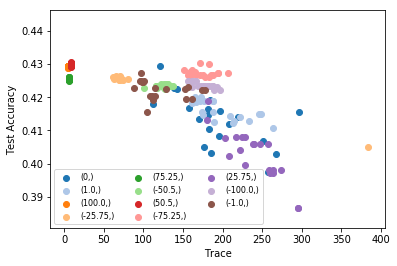

In [100]:
plot_special(exp_dict, "trace:all", 
             "acc test", filter_seperate=[], filter_not_seperate=["softmax_beta"],
             pre_filtered_exp_ids=None,
             save_exp_path=experiment_folder, X_axis_bounds=None, Y_axis_bounds=None,
        X_axis_display_name="Trace", Y_axis_display_name="Test Accuracy", 
)


Correlation for (0,) trace:all/acc train: -0.810550262197468
Correlation for (1.0,) trace:all/acc train: -0.9468601583574487
Correlation for (100.0,) trace:all/acc train: nan
Correlation for (-25.75,) trace:all/acc train: -0.998768363219076
Correlation for (75.25,) trace:all/acc train: nan
Correlation for (-50.5,) trace:all/acc train: 0.549033992542039
Correlation for (50.5,) trace:all/acc train: nan
Correlation for (-75.25,) trace:all/acc train: -0.8039867160343224
Correlation for (25.75,) trace:all/acc train: -0.8931043173320938
Correlation for (-100.0,) trace:all/acc train: 0.4760686005935041
Correlation for (-1.0,) trace:all/acc train: -0.8307868317886303


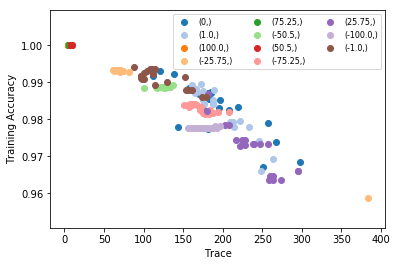

In [101]:
plot_special(exp_dict, "trace:all", 
             "acc train", filter_seperate=[], filter_not_seperate=["softmax_beta"],
             pre_filtered_exp_ids=None,
             save_exp_path=experiment_folder, X_axis_bounds=None, Y_axis_bounds=None,
        X_axis_display_name="Trace", Y_axis_display_name="Training Accuracy", 
)


Correlation for (0,) trace:all/loss train: 0.7538199515826485
Correlation for (1.0,) trace:all/loss train: 0.9311195003930683
Correlation for (100.0,) trace:all/loss train: 0.1566573168278865
Correlation for (-25.75,) trace:all/loss train: 0.9982372246282047
Correlation for (75.25,) trace:all/loss train: 0.03831370945781648
Correlation for (-50.5,) trace:all/loss train: -0.6245568716353364
Correlation for (50.5,) trace:all/loss train: -0.2097382917007546
Correlation for (-75.25,) trace:all/loss train: 0.8250583603592739
Correlation for (25.75,) trace:all/loss train: 0.8405368236049426
Correlation for (-100.0,) trace:all/loss train: -0.10610345163847848
Correlation for (-1.0,) trace:all/loss train: 0.7818162745305057


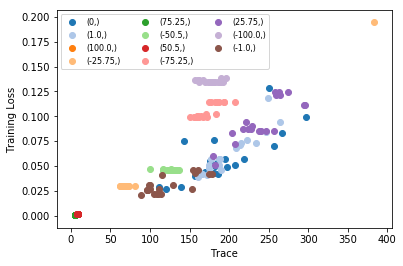

In [102]:
plot_special(exp_dict, "trace:all", 
             "loss train", filter_seperate=[], filter_not_seperate=["softmax_beta"],
             pre_filtered_exp_ids=None,
             save_exp_path=experiment_folder, X_axis_bounds=None, Y_axis_bounds=None,
        X_axis_display_name="Trace", Y_axis_display_name="Training Loss", 
)


Correlation for (0,) softmax_beta/trace:all: nan
Correlation for (1.0,) softmax_beta/trace:all: nan
Correlation for (100.0,) softmax_beta/trace:all: nan
Correlation for (-25.75,) softmax_beta/trace:all: nan
Correlation for (75.25,) softmax_beta/trace:all: nan
Correlation for (-50.5,) softmax_beta/trace:all: nan
Correlation for (50.5,) softmax_beta/trace:all: nan
Correlation for (-75.25,) softmax_beta/trace:all: nan
Correlation for (25.75,) softmax_beta/trace:all: nan
Correlation for (-100.0,) softmax_beta/trace:all: nan
Correlation for (-1.0,) softmax_beta/trace:all: nan


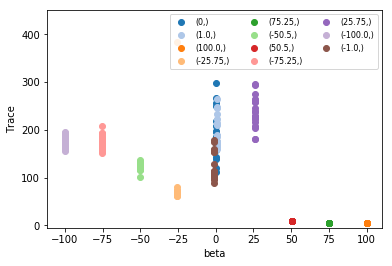

In [108]:
plot_special(exp_dict, "softmax_beta", 
             "trace:all", filter_seperate=[], filter_not_seperate=["softmax_beta"],
             pre_filtered_exp_ids=None,
             save_exp_path=experiment_folder, X_axis_bounds=None, Y_axis_bounds=[-5, 450],
            X_axis_display_name="beta", Y_axis_display_name="Trace", )

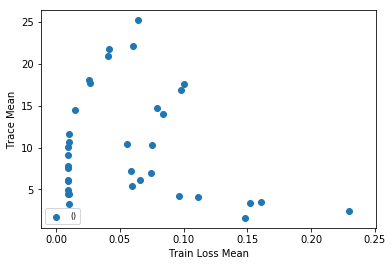

In [42]:

      
plot_stats(stats_df,  "Train Loss Mean", "Trace Mean",filter_by=[], seperate=True)



In [539]:
def sampling_plot_arr(values_arr, resampling_arr):
    x_vals = []
    y_vals = []

    for p in range(len(values_arr)):
        last_resampling = 0
        already_added = False

        for t in range(len(values_arr[p])):
            if resampling_arr[t][p] != p:
                if (last_resampling == 0) and (not already_added):
                    x_vals.append(list(range(last_resampling, t + 1)))
                    y_vals.append(values_arr[p][last_resampling:t + 1])
                    already_added = True
                else:
                    starts_at = values_arr[resampling_arr[last_resampling][p]][last_resampling]
                    x_vals.append(list(range(last_resampling, t + 1)))
                    y_vals.append([starts_at] + list(values_arr[p][last_resampling + 1:t + 1]))

                last_resampling = t

        if (last_resampling == 0):
            x_vals.append(list(range(last_resampling, t + 1)))
            y_vals.append(values_arr[p][last_resampling:t + 1])
        else:
            starts_at = values_arr[resampling_arr[last_resampling][p]][last_resampling]
            x_vals.append(list(range(last_resampling, t + 1)))
            y_vals.append([starts_at] + list(values_arr[p][last_resampling + 1:t + 1]))
    return x_vals, y_vals


In [540]:
y_vals[0].shape

(6000, 20)

In [139]:
Y_axis_name = "Potential/curr"
exp_ids = ["1591788816.278688"]

x_vals, y_vals = get_runs_arr(exp_dict, Y_axis_name, exp_ids)


In [140]:
y_vals[0].T[0]

array([0.21366821, 0.1769249 , 0.22196284, ..., 0.94053525, 0.24099749,
       1.49284363])

In [141]:
y_vals.shape

(1, 5000, 20)

In [142]:
time_range = [-10, -1]

sampling_arr = exp_dict["resampling_idxs"][exp_ids[0]]
resampling_arr = np.array([sampling_arr[str(i)] for i in range(len(sampling_arr))])[1:-1]
y_vals_reduced = y_vals[0][time_range[0]:time_range[1]]
resampling_arr_reduced = resampling_arr[time_range[0]: time_range[1]]
n_x, n_y = sampling_plot_arr(y_vals_reduced.T, resampling_arr_reduced)

In [232]:

exp_id = "1590496353.8190389" # sharp
# exp_id = "1590496353.106369" # flat

exp_id = "1590274168.6045089"

model_a = exp_dict["models"][exp_id][str(0)]
net = copy.deepcopy(model_a)


In [235]:
# get data
train_data, test_data = get_postprocessing_data(experiment_folder, vectorized=True)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)  # fix the batch size
full_train_loader = DataLoader(train_data, batch_size=len(train_data), shuffle=True)  # fix the batch size

test_loader = DataLoader(test_data, batch_size=1 ) #len(test_data))

criterion = torch.nn.CrossEntropyLoss()
cfs_dict = exp_dict["stuff"]["configs"].loc[exp_id].to_dict()
optimizer = optim.SGD(net.parameters(), lr=cfs_dict["learning_rate"],
                                    momentum=cfs_dict["momentum"])
num_steps = 1000

data = next(iter(full_train_loader))

model_b, grad_arr, projs = take_n_gd_steps(net, optimizer, criterion, data, n=num_steps, get_grad=False,
                                           v1=None, v2=None, offset=model_a)



0
tensor(0.0088, grad_fn=<NllLossBackward>)

100
tensor(0.0081, grad_fn=<NllLossBackward>)

200
tensor(0.0076, grad_fn=<NllLossBackward>)

300
tensor(0.0071, grad_fn=<NllLossBackward>)

400
tensor(0.0067, grad_fn=<NllLossBackward>)

500
tensor(0.0063, grad_fn=<NllLossBackward>)

600
tensor(0.0060, grad_fn=<NllLossBackward>)

700
tensor(0.0057, grad_fn=<NllLossBackward>)

800
tensor(0.0054, grad_fn=<NllLossBackward>)

900
tensor(0.0052, grad_fn=<NllLossBackward>)



In [410]:
d_t = []
for i, (data, target) in enumerate(train_loader):
    d_t.append((data, target))
    
    break

In [36]:

beta_bound = [-3,3]
num_inter_models = 20

inter_a = get_model_interpolate_arr(model_c, model_d, num_inter_models, beta_bound=beta_bound)

In [37]:
model_dict = {str(i): inter_a[i] for i in range(len(inter_a))}

In [38]:
traces = get_models_trace(model_dict, full_train_loader, criterion, full_dataset=False)
loss_dict,acc_dict = get_models_loss_acc(model_dict, full_train_loader, test_loader)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [365]:
def get_gap(b):
    a = list(b.values())[0]
    return a[1] - a[0]

In [94]:
print("Trace flat: {}".format(np.mean(list(trace.values())[0])))

print("Acc flat: {}".format(get_gap(acc_dict)))
print("Loss flat: {}".format(get_gap(loss_dict)))

Trace flat: 2.773572015762329
Acc flat: -0.055400000000000005
Loss flat: 0.23567577661015093


19


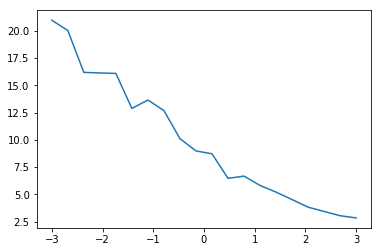

In [39]:

xs = np.linspace(beta_bound[0], beta_bound[1], num_inter_models)
ys = [np.mean(traces[a]) for a in traces]
print(np.argmin(ys))
plt.plot(xs, ys)

19


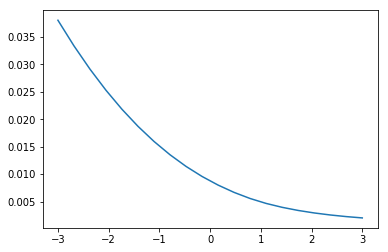

In [40]:

xs = np.linspace(beta_bound[0], beta_bound[1], num_inter_models)
ys = [loss_dict[a][0] for a in loss_dict]
print(np.argmin(ys))
plt.plot(xs, ys)

19


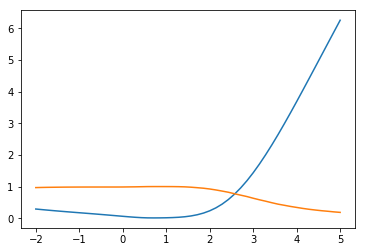

In [207]:

xs = np.linspace(beta_bound[0], beta_bound[1], 50)
loss_arr = [loss_dict[a][0] for a in loss_dict]
acc_arr = [acc_dict[a][0] for a in acc_dict]
trace_arr = [np.mean(traces[a]) for a in traces]

print(np.argmin(ys))
plt.plot(xs, loss_arr)
plt.plot(xs, acc_arr)
# plt.plot(xs, trace_arr)

16


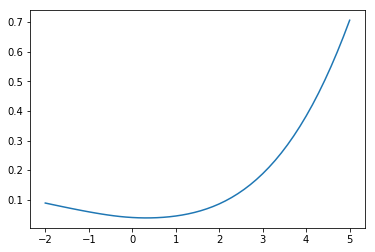

In [150]:
xs = np.linspace(beta_bound[0], beta_bound[1], num_inter_models)
ys = [float(a[0]) for a in i_a[1]]
print(np.argmin(ys))

plt.plot(xs, ys)

In [ ]:
def project_onto(net, v1, v2):
    v1_norm = v1/torch.norm(v1)
    v2_norm = v2/torch.norm(v2)
    
    net_vect = get_params_vec(net)
    alpha = torch.matmul(v1_norm, net_vect)
    beta = torch.matmul(v2_norm, net_vec)
    
    return alpha, beta

In [195]:
np.e**250 - np.e**240

3.7462845257262665e+108

In [196]:
x=  np.random.normal(scale=1, size=(1000, 2))
y = 1 * (x[:, 0] >= 0)
ct = 0
def flip(val, alpha):
    should_flip = np.random.uniform(0, 1)<alpha
    global ct
    if should_flip:
        ct += 1
        if val == 0:
            val = 1
        elif val == 1:
            val = 0
    return val
y = [flip(a, 0.05) for a in y]
x += np.random.normal(scale=0.15, size=x.shape)

In [197]:
c = 0
for a, b in zip(x, y):
    if (a[0] < 0) and (b == 1):
        c+=1
    elif (a[0] > 0) and (b == 0):
        c+=1 

In [5]:
import numpy as np

In [6]:
def get_max(n, mu, cov):
    Xs = np.random.multivariate_normal(mu, cov, n)
    Xs_sq = [np.linalg.norm(x)**2 for x in Xs]
    return np.linalg.norm(Xs[np.argmax(Xs_sq)])

def get_mean(mu, cov, num_rv_samples, N):
    Rs = []
    for _ in range(num_rv_samples):
        Rs.append(get_max(N, mu, cov))
        
    return np.mean(Rs)

In [126]:
import plotly.graph_objects as go

x_axis = "Path Weight Sum"
y_axis = "Trace Mean"
z_axis = "Acc Test Mean"

x_vals = stats_df[x_axis]
y_vals = stats_df[y_axis]
z_vals = stats_df[z_axis]

fig = go.Figure(data=[go.Scatter3d(x=x_vals, y=y_vals, z=z_vals,
                                   mode='markers')])
fig.show()

In [11]:
from scipy.stats import ortho_group  # Requires version 0.18 of scipy

import matplotlib.pyplot as plt

In [9]:
N = 100
res = []
dim = 5

mu = np.zeros(dim)



for _ in range(0, 100, 1):
    eigs = np.random.uniform(0, 100, dim)
    d_eigs = np.diag(eigs)
    P = ortho_group.rvs(dim=dim)

    cov = P.T.dot(d_eigs.dot(P))
    a = np.sqrt(eigs.dot(eigs))
    res.append((a, get_mean(mu, cov, 100, N)))
res = np.array(res)

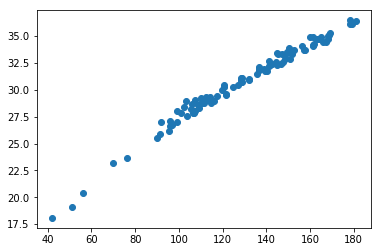

In [12]:
plt.scatter(res[:, 0], res[:, 1])

In [55]:
N = 20
res = []
mu = np.array([0, 0])
for a in range(1000):
    res.append((a, 5*((a**2 + 1**2 + 500**2))**0.5))
res = np.array(res)

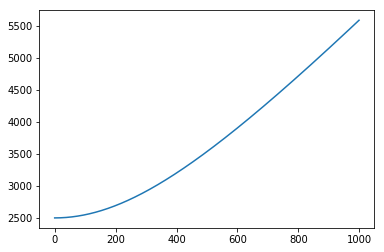

In [56]:
plt.plot(res[:, 0], res[:, 1])

In [113]:
import plotly.graph_objects as go

X = np.linspace(-10,  10, 100)
Y = np.linspace(-50,  50, 100)
inp = np.meshgrid(X, Y)
Z = inp[0] ** 2
fig = go.Figure(data=[go.Surface(z=Z, x=inp[0], y=inp[1], colorscale="Viridis")])

fig.update_layout(title='Function', autosize=False,
                  width=1000, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [83]:
m = 5
d = 2

g = lambda x: m*x + d
f = lambda x: m*x + d + np.random.normal(scale=15)
X = np.linspace(-10, 10, 100)
Y = [(x, f(x)) for x in X]
Y += [(x, f(x)) for x in X]
Y = np.array(Y)

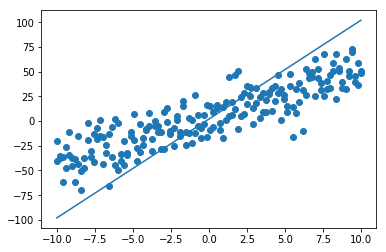

In [84]:
h = lambda x: 10*x + d


plt.scatter(Y[:, 0], Y[:, 1])
plt.plot(X, [h(x) for x in X])

In [115]:
W = np.linspace(-20, 20, 100)
B = np.linspace(-3, 6, 100)

inp = np.array(np.meshgrid(W, B)).T

L = lambda w, b: 1/len(Y) * np.sum([(w*x + b - y)**2 for x, y in Y])

In [122]:
L(10, 9)

1215.4751854022416

In [116]:
z = []
mini_val = float("inf")
mini_params = None
for i in range(len(inp)):
    curr = []
    for j in inp[i]:
        curr.append(L(*j))
        if curr[-1] < mini_val:
            mini_val = curr[-1]
            mini_params = j
    z.append(curr)



In [117]:
mini_params

array([4.64646465, 4.54545455])

In [118]:
z = np.array(z)

In [123]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=z.T, x=inp.T[0], y=inp.T[1], colorscale="Viridis")])

# fig.update_layout(title='Function', autosize=False,
#                   width=1000, height=800,
#                   margin=dict(l=65, r=50, b=65, t=90))

fig.show()

(5000, 20)

In [181]:
a = find_lineages(resampling_arr)

0.5553889274597168


In [251]:
take_slice(b, [[1, 0], [0, 1]])

[array([2, 1]), array([3, 4])]

In [7]:
def get_linages_vals(lineages, val_arr):
    arr_lineages = np.array(list(lineages.values()))
    return np.array(take_slice(val_arr, arr_lineages.T)).T

In [258]:
res_ids = [[0, 1, 2], [1, 1, 2], [0, 1, 2], [2, 1, 0], [1, 0, 1]]
lineages, assignments = find_lineages(res_ids)


In [259]:
val_arr = [[100, 200, 300], [1, 2, 3], [6, 2, 74], [7, 3, 67], [12, 4, 2]]



array([[200,   2,   2,   3,   4],
       [300,   3,  74,  67,  12]])

In [273]:
Y_axis_name = "Potential/curr"
exp_ids = ["1590274168.6045089"] 
# exp_ids = ["1592003257.678787"]

x_vals, y_vals = get_runs_arr(exp_dict, Y_axis_name, exp_ids)


In [274]:
time_range = [-10, -1]

sampling_arr = exp_dict["resampling_idxs"][exp_ids[0]]
resampling_arr = np.array([sampling_arr[str(i)] for i in range(len(sampling_arr))])[1:-1]
y_vals_reduced = y_vals[0][time_range[0]:time_range[1]]
resampling_arr_reduced = resampling_arr[time_range[0]:time_range[1]]

In [275]:
lineages, assignments = find_lineages(resampling_arr)

b = get_linages_vals(lineages, np.array(y_vals[0]))

dict_keys([15, 10])
{4: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}


In [179]:
resampling_arr[4976:4978]

array([[13, 12,  0,  7,  4,  0, 15, 14, 16, 18,  7,  6, 15,  5,  3,  8,
         5, 13, 15, 16],
       [15, 16,  7,  0,  2, 16, 14,  9, 11, 13,  3, 19, 13, 17, 18,  8,
        14,  3, 14, 10]])

In [173]:
a = list(lineages.values())
a = np.array(a).T

In [107]:
a[4977]

array([ 3, 10, 10,  3, 10, 10, 10,  3, 10, 10,  3])

In [272]:
np.sum(b[0])

843.1131984721869

In [276]:
np.sum(b[0])

636.8659511697479

In [266]:


stats_df = get_end_stats(exp_dict)
# stats_df = stats_df[stats_df["Mean Train Loss"] < 0.25]
stats_df.sort_values(by="Path Weight Sum", ascending=False)

Acc Test Max  Acc Test Mean  Acc Test Min  Acc Train Max  \
1590274168.6045089        0.9398       0.939725        0.9397       0.985667   
1590274169.318323         0.9493       0.949250        0.9492       0.990167   
1590273013.958532         0.9422       0.942085        0.9419       0.992833   
1590273481.150822         0.9507       0.950455        0.9501       0.992333   
1590258146.3691258        0.9449       0.944420        0.9438       1.000000   
1590258138.459473         0.9444       0.942915        0.9418       1.000000   
1590258142.795455         0.9441       0.943670        0.9434       1.000000   
1590258140.47573          0.9445       0.944175        0.9440       1.000000   
1590258144.654412         0.9437       0.943145        0.9429       1.000000   
1590258148.1805718        0.9431       0.942660        0.9424       1.000000   
1590274124.349066         0.9430       0.942925        0.9429       1.000000   
1590258147.138657         0.9490       0.948720        0.9485       0.999500   
1590258143.5921988        0.9506       0.950430        0.9502       1.000000   
1590258141.549438         0.9514       0.950905        0.9507       1.000000   
1590258139.372339         0.9527       0.950400        0.9485       1.000000   
1590258145.777937         0.9479       0.947720        0.9474       1.000000   
1590258149.216182         0.9511       0.950950        0.9508       1.000000   
1590274152.405887         0.9504       0.950310        0.9503       1.000000   

                    Acc Train Mean  Acc Train Min   Dist Max  Dist Mean  \
1590274168.6045089        0.985667       0.985667  23.429565  23.159874   
1590274169.318323         0.990167       0.990167  30.266439  30.041732   
1590273013.958532         0.992833       0.992833  23.787024  23.513069   
1590273481.150822         0.992333       0.992333  31.320831  31.098688   
1590258146.3691258        1.000000       1.000000  24.509089  24.234799   
1590258138.459473         1.000000       1.000000  20.374111  20.048445   
1590258142.795455         1.000000       1.000000  24.569567  24.295405   
1590258140.47573          1.000000       1.000000  24.566637  24.292101   
1590258144.654412         1.000000       1.000000  24.417875  24.154645   
1590258148.1805718        1.000000       1.000000  24.908764  24.635928   
1590274124.349066         1.000000       1.000000  24.673094  24.418802   
1590258147.138657         0.999500       0.999500  33.379387  33.165922   
1590258143.5921988        1.000000       1.000000  36.445019  36.252909   
1590258141.549438         1.000000       1.000000  36.485943  36.288279   
1590258139.372339         1.000000       1.000000  34.152481  31.314790   
1590258145.777937         1.000000       1.000000  33.839199  33.653264   
1590258149.216182         1.000000       1.000000  36.937851  36.757661   
1590274152.405887         1.000000       1.000000  35.382759  35.196056   

                     Dist Min  Gap Mean  ...  Loss Train Max  Loss Train Mean  \
1590274168.6045089  18.837921 -0.045942  ...        0.088939         0.088840   
1590274169.318323   26.763042 -0.040917  ...        0.075427         0.075360   
1590273013.958532   19.262140 -0.050748  ...        0.046968         0.046720   
1590273481.150822   27.944061 -0.041878  ...        0.045063         0.045000   
1590258146.3691258  20.148273 -0.055580  ...        0.003347         0.003323   
1590258138.459473   19.676243 -0.057085  ...        0.003370         0.003106   
1590258142.795455   20.216843 -0.056330  ...        0.003191         0.003171   
1590258140.47573    20.218199 -0.055825  ...        0.003166         0.003159   
1590258144.654412   19.995667 -0.056855  ...        0.003024         0.003010   
1590258148.1805718  20.607590 -0.057340  ...        0.002725         0.002719   
1590274124.349066   20.297909 -0.057075  ...        0.002201         0.002199   
1590258147.138657   30.236176 -0.050780  ...        0.003030         0.002990   
1590258143.5921988  

In [174]:
a = list(lineages.values())
a = np.array(a)

In [175]:
a.shape

(11, 5000)

In [176]:
for t, c in enumerate(a.T):
    if len(set(c)) > 1:
        print(c)
        print(t)
        break
        
    

[ 3 10 10  3 10  3  3  3 10  3  3]
4977


In [91]:
a.T[4977:4980]

array([[ 3, 10, 10,  3, 10, 10, 10,  3, 10, 10,  3],
       [10, 19, 19, 10, 19, 19, 19, 10, 19, 19, 10],
       [18,  7,  7, 18,  7,  7,  7, 18,  7,  7, 18]])

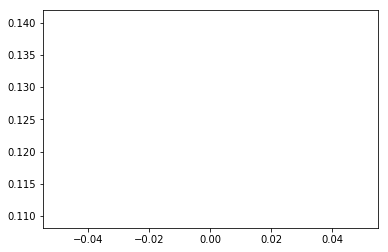

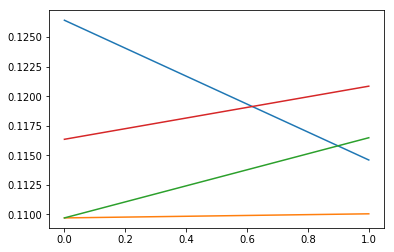

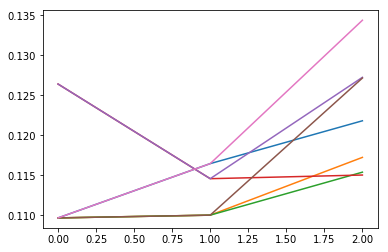

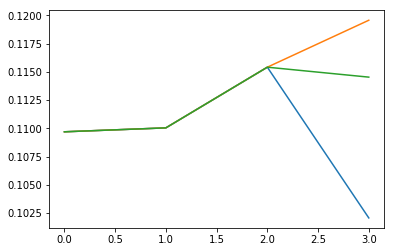

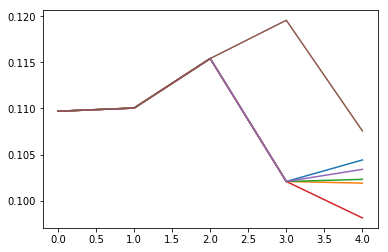

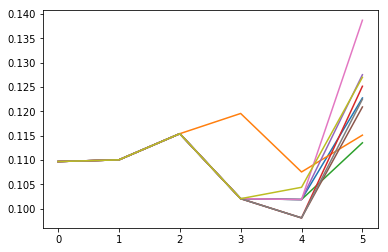

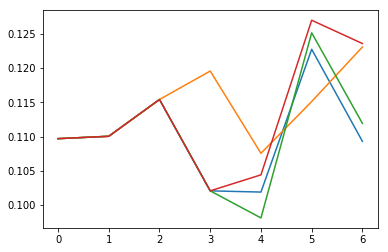

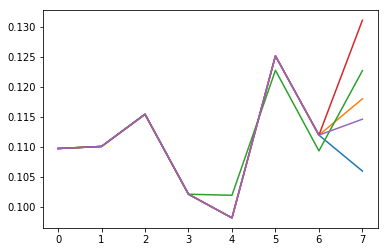

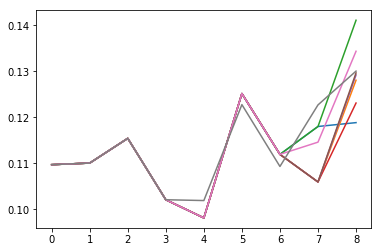

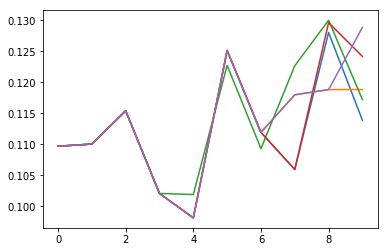

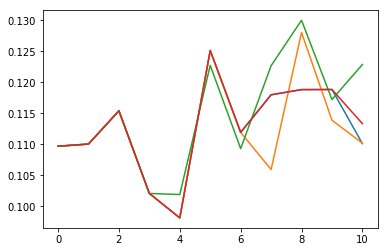

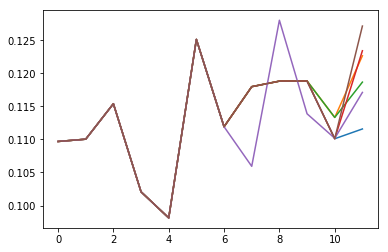

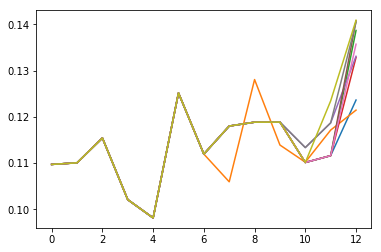

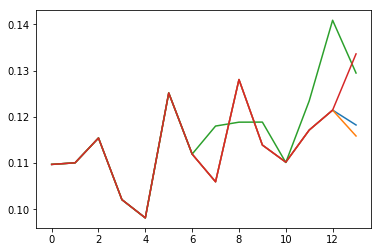

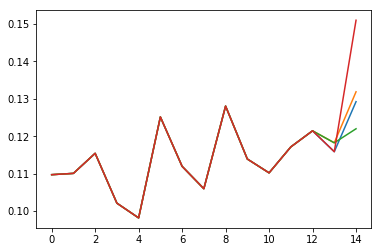

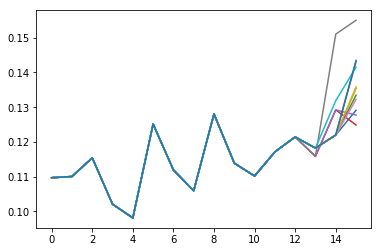

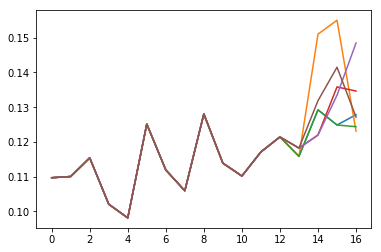

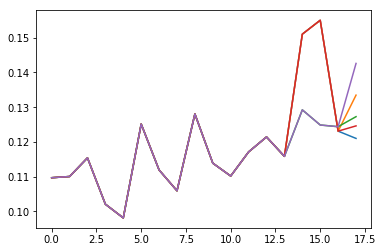

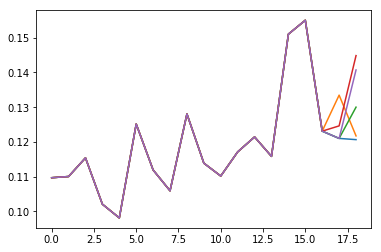

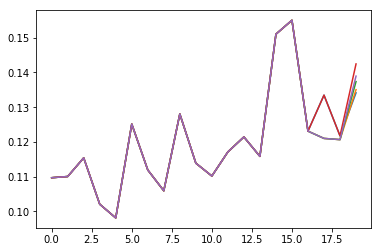

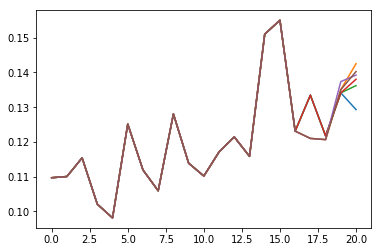

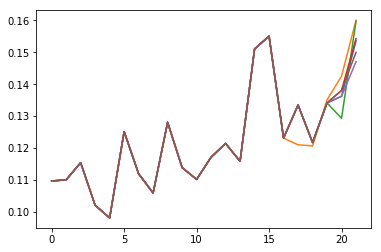

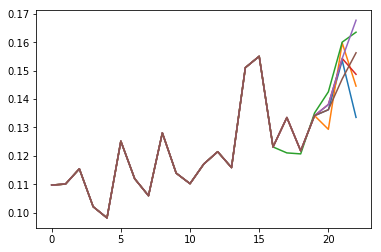

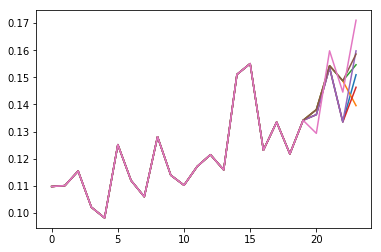

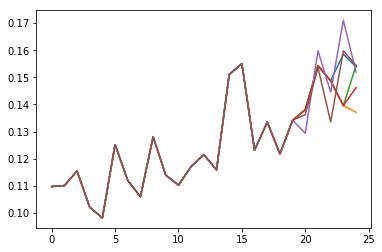

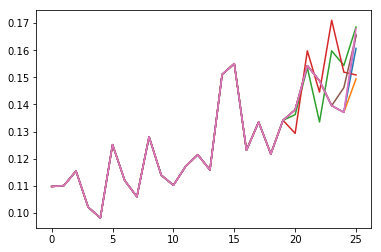

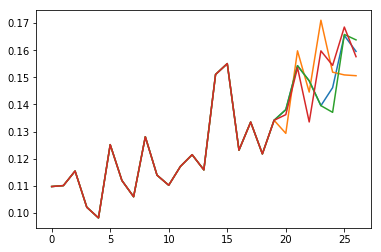

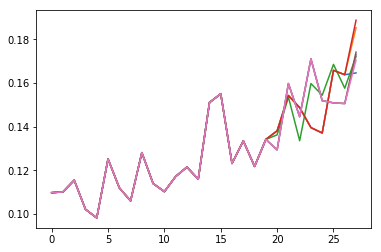

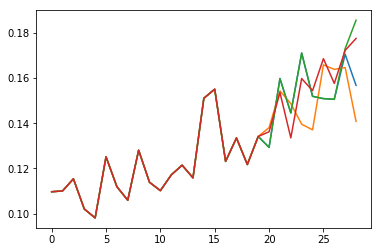

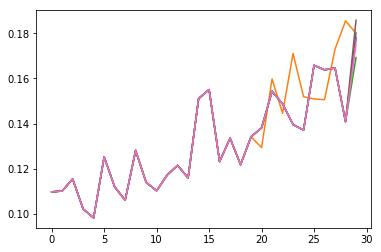

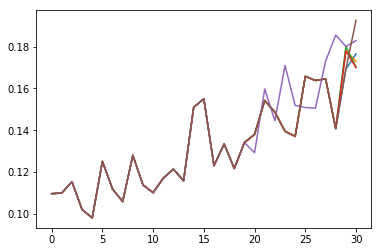

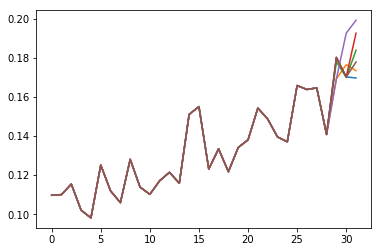

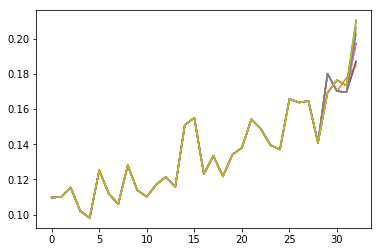

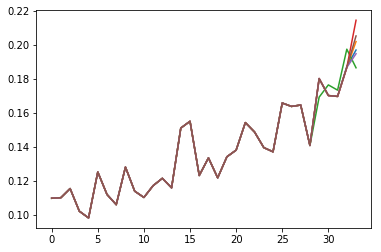

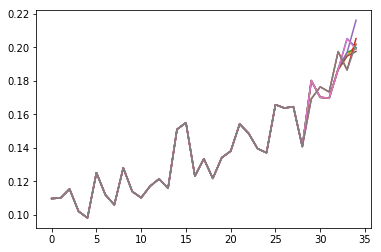

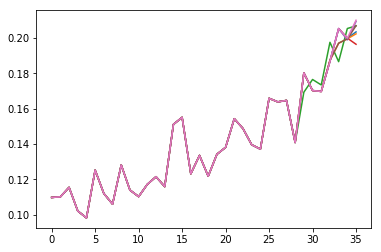

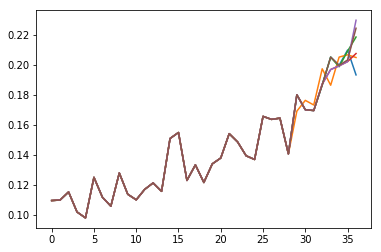

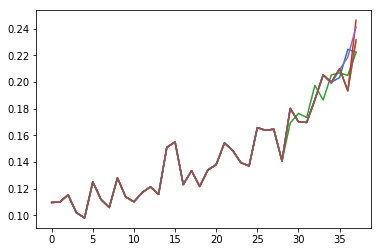

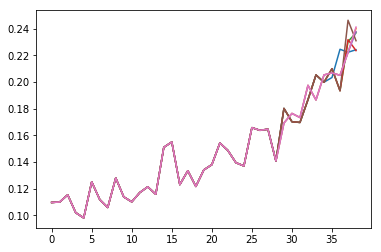

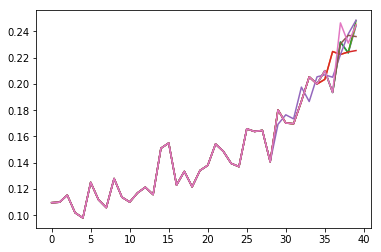

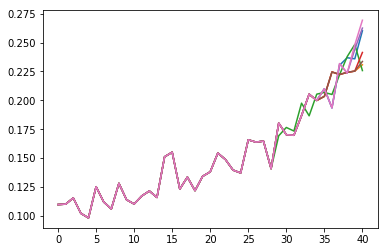

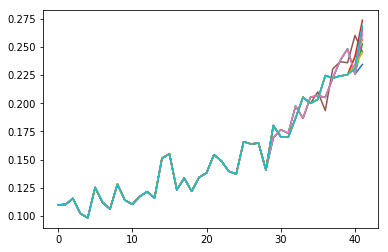

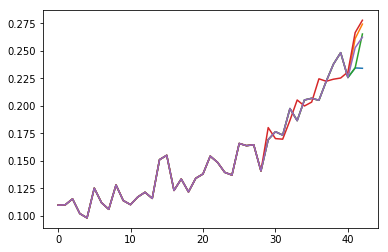

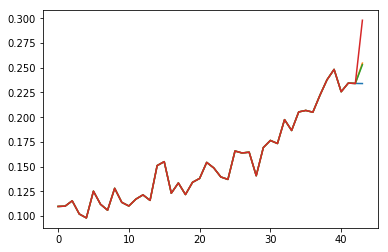

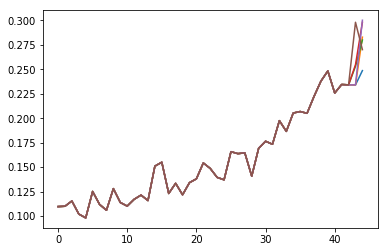

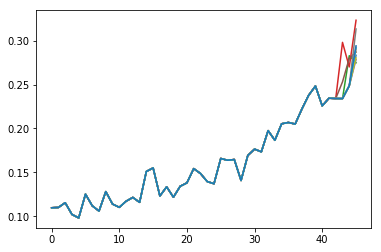

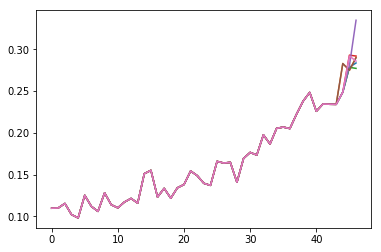

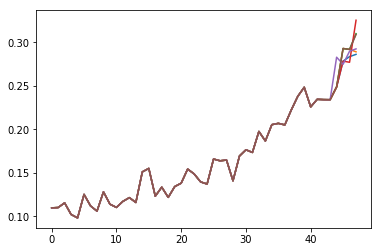

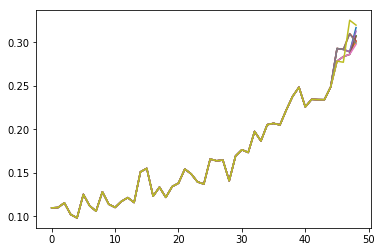

In [277]:
for t in range(1, 50):

    lineages, assignments = find_lineages(resampling_arr[:t])
    b = get_linages_vals(lineages, np.array(y_vals[0])[:t])
    for k in b:
        plt.plot(k)
    plt.show()

In [142]:
lineages, assignments = find_lineages(resampling_arr[:400])


In [254]:
a = np.array(list(lineages.values()))

In [252]:
lineages, assignments = find_lineages(resampling_arr[1:])


In [398]:


def sample_nets(nets, idxs):
    """Memory efficient method to sample nets given a sample idx array. Mutates nets and idxs.
    Step 1: check if there are leaf nodes i.e. models which are not spawn particles. We can safely assign 
            new weights to those. Notice, these particles have now also become spawn particles, so some permutation 
            cycles are broken now.
    Step 2: If there is a permutation cycle left, we keep one temporary variable and fix the rest of the permutation 
            cycle. This can only happen if none of the particles ever had a leaf node attached to them.
        """
    unique_s = set(idxs)
    
    # leaf routine
    replace_dict = {}
    saw_leaf = False
    we_done = True
    for p in range(len(idxs)):
        s = idxs[p]
        we_done = we_done and (p == s)
        if p not in unique_s:
            saw_leaf = True
            # mutate net
            nets[p].load_state_dict(nets[s].state_dict()) # nets[p] = nets[s] 
            
            # change idxs to indicate we have updated this net 
            idxs[p] = p
            if s not in replace_dict:
                replace_dict[s] = p

    if we_done:
        return 

    if saw_leaf:
        for i in range(len(idxs)):
            if (i == idxs[i]):
                continue
            if idxs[i] in replace_dict:
                idxs[i] = replace_dict[idxs[i]]
        sample_nets(nets, idxs) # check if we can exploit some new leafs, otherwise we onlly have permutations.
    else:
        # cycle routine
        for i in range(len(idxs)):
            if (i == idxs[i]):
                continue
            else:
                tmp_net = copy.deepcopy(nets[i]) # tmp_net = nets[i]
                curr_p = i
                prev_p = idxs[i]
                while prev_p != i:
                    nets[curr_p].load_state_dict(nets[prev_p].state_dict()) # nets[curr_p] = nets[prev_p]

                    idxs[curr_p] = curr_p
                    curr_p = prev_p
                    prev_p = idxs[curr_p]
                nets[curr_p].load_state_dict(tmp_net.state_dict()) # nets[curr_p] = tmp_net
                idxs[curr_p] = curr_p
    


In [399]:
m = [exp_dict["models"]["1592258035.9073222"][str(i)] for i in range(20)]
idxs = np.random.choice(list(range(len(m))), len(m))

In [412]:
m = m = [exp_dict["models"]["1592258035.9073222"][str(i)] for i in range(20)] # np.random.randint(0, 100, size=100)
idxs =  np.random.choice(list(range(len(m))), len(m))
a = time.time()
m_right = [copy.deepcopy(m[i]) for i in idxs]
b = time.time()
sample_nets(m, idxs)
c = time.time()
assert all([same_model(m[i], m_right[i]) for i in range(len(m))])

print(idxs)

print(b - a)
print(c - b)




[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
0.026307106018066406
0.016455888748168945


In [394]:
def same_model(model1, model2):
    params1 = model1.named_parameters()
    params2 = model2.named_parameters()

    params2_dict = dict(params2)
    for name1, param1 in params1:
        if name1 in params2_dict:
            if not torch.equal(params2_dict[name1].data, param1.data):
                return False
        else:
            return False

    return True

In [396]:
same_model(m[0], m[1])

False